In [36]:
# Paso 1 - Importar librerias y carga de datos
import tensorflow as tf
from tensorflow import keras
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

In [3]:
print(tf.__version__)

2.17.0


In [4]:
# cargando datos 
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
# separar datos de entrenamento y de prueba
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# Paso 2 - Análisis exploratorio de los datos
print(X_train.shape)

(60000, 28, 28)


In [11]:
print(y_test.shape)

(10000,)


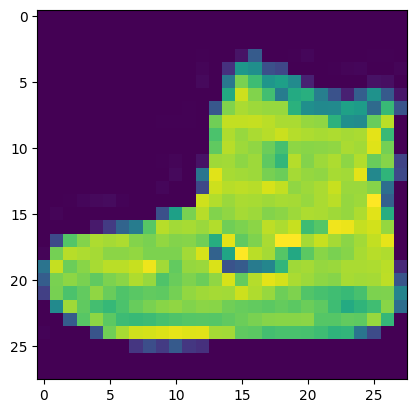

In [12]:
plt.figure()
plt.imshow(X_train[0])

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

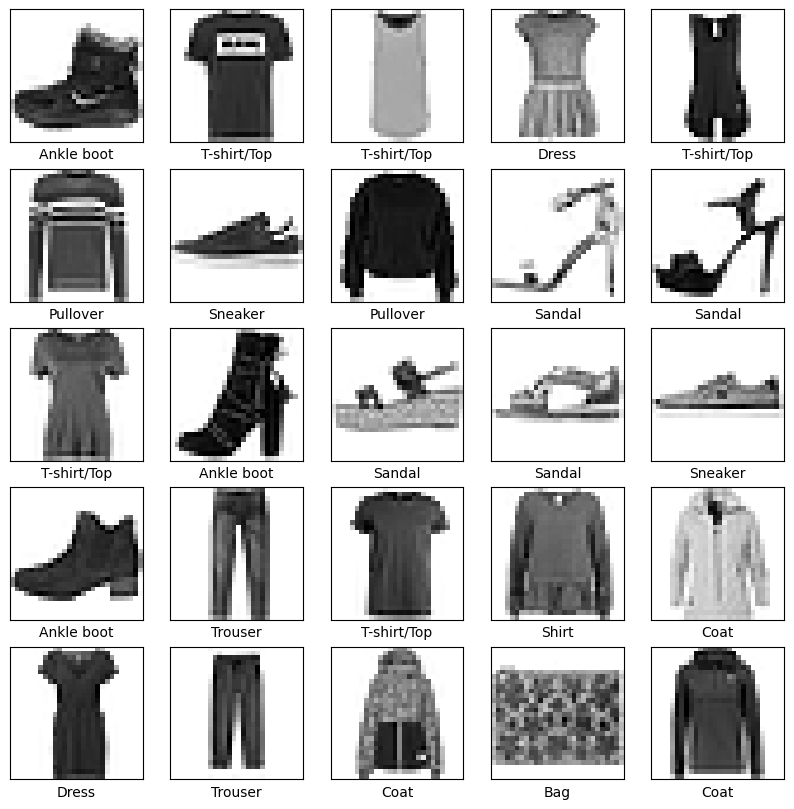

In [18]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [20]:
# Paso 3. Crear y entrenar mi modelo

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [22]:
model.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5550 - loss: 1.5061
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7623 - loss: 0.6670
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7925 - loss: 0.5750
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8128 - loss: 0.5302
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8232 - loss: 0.4994
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8310 - loss: 0.4809
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8376 - loss: 0.4612


In [23]:
# Paso 4 predicciones y evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8347 - loss: 0.4743


In [24]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8282999992370605


In [25]:
predictions = model.predict(X_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
[3.3184087e-06 2.7827787e-07 2.4839172e-05 2.0290667e-05 1.4055725e-05
 1.2944716e-01 3.9598628e-05 2.9361564e-01 4.4297762e-03 5.7240510e-01]
9
9


In [26]:
def plot_image(i, j, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[j], img[j]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  print(np.argmax(predictions_array), 100*np.max(predictions_array), class_names[true_label])

In [27]:
def plot_value_array(i, j, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[j]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

9 57.24050998687744 Ankle boot


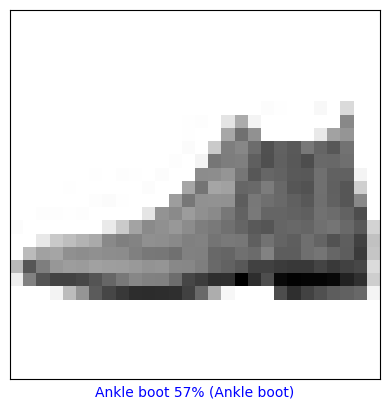

In [28]:
plot_image(0, 0, predictions, y_test, X_test)

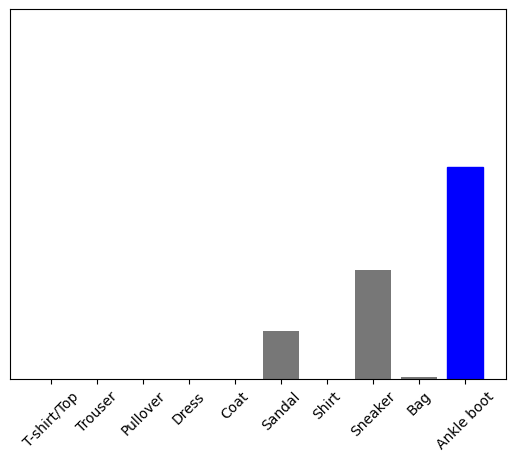

In [31]:
plot_value_array(0, 0, predictions, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

5 72.1900463104248 Sneaker


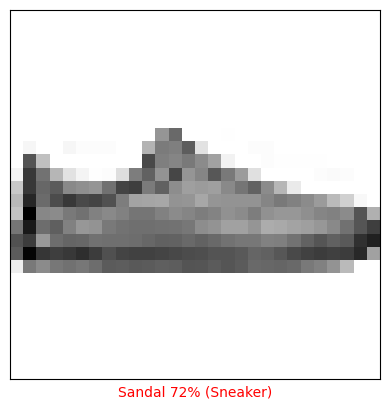

In [32]:
plot_image(12, 12, predictions, y_test, X_test)

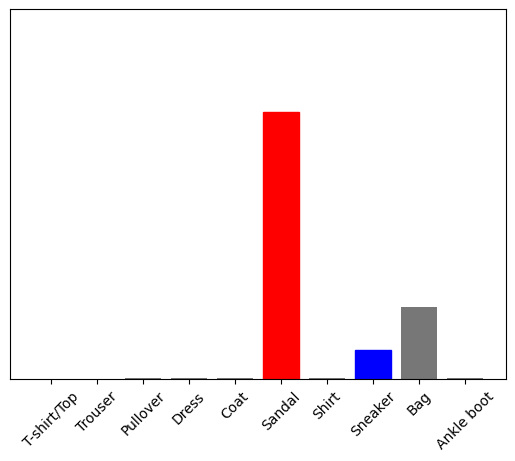

In [33]:
plot_value_array(12, 12, predictions, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

2 65.07315635681152 Coat


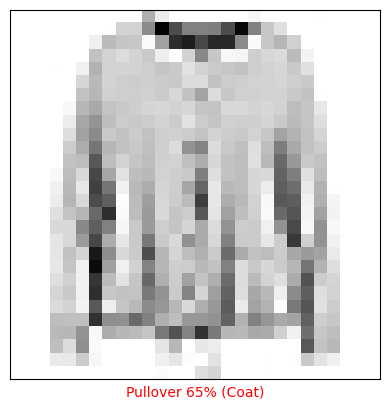

In [34]:
plot_image(25, 25, predictions, y_test, X_test)

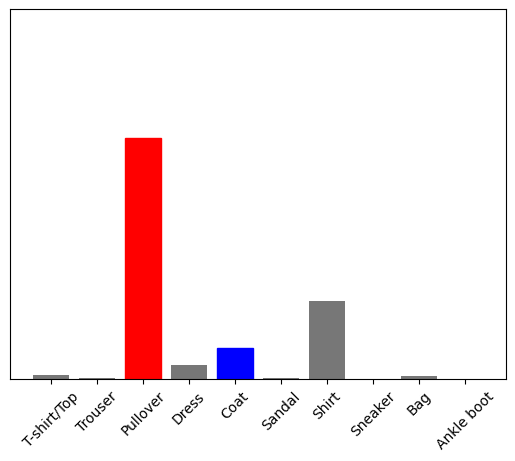

In [35]:
plot_value_array(25, 25, predictions, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
predictions = np.argmax(predictions, axis = 1)
cm = confusion_matrix(y_test, predictions)

In [39]:
print(cm)

[[795   3  10  71   4   4 100   0  13   0]
 [  2 944   9  36   5   0   3   0   1   0]
 [ 17   1 733  13 125   1 106   0   4   0]
 [ 23  13   4 875  30   1  50   0   4   0]
 [  0   1 117  45 722   0 110   0   5   0]
 [  0   0   0   1   0 901   0  56   2  40]
 [145   2 125  60 108   1 536   0  23   0]
 [  0   0   0   0   0  39   0 894   0  67]
 [  2   1  10  12   3   6  24   6 936   0]
 [  0   0   0   0   0  16   0  36   1 947]]
